 # <font color='ORange'> Welcome to Assignment 1 for AST30001 </font>

For those unfamiliar with Jupyter Notebook, each (grey) window can be run by clicking in the box (anywhere) and pressing 'shift'+'enter' keys.  

To add another cell to run more code, click the insert button at the top of the browser, and 'Insert Cell Above/Below'.  However, you will not need to do this to run the assignment.  

To explore Jupyter notebooks further, you can find tutorials at this website: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks.

Any issues or questions please email swebb@swin.edu.au with the subject title containing "AST30001 assignment - "

ENJOY! 

First let's start by loading all our modules for this session.  We are running an online interactive session, so we'll need to install the modules first (Note: if you run python on your local computer you won't need to do this).  Click in the window below and press 'shift'+'enter'.  Once it finishes, do the same for the next box below (the second box won't appear to do anything).
<br>
<font color='Green'> Press 'Shift' + 'Enter' in below box </font>

In [45]:
!pip install astropy 
!pip install matplotlib 
!pip install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


<br>
<font color='Green'> Press 'Shift' + 'Enter' in below box </font>

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from spec_tools_new import *
import subprocess
%matplotlib inline
from decimal import Decimal

Great. For this assignment we will be looking at the star HD122563 and comparing it to a solar twin star HD147513.

The aim of this assignment is to get a better idea of concepts learned in class, such as spectral type, spectral features, radial velocity, and metallicity by working with data and computing the values.

# Prep - First we need to read in our data

We can do this by selecting the box below and pressing 'shift'+'enter' (again, nothing will appear to happen, but the data should be read in).  The code uses a pre-defined function called 'open_file' that takes the inputs the ID of the star and assigns the wavelength and flux to output arrays. 
<br>
<br>
<font color='Green'> Press 'Shift' + 'Enter' in below box </font>

In [47]:
star_id = 'HD122563'
wave,flux = open_file(star_id)

solar_twin = 'HD147513'
sol_wave,sol_flux = open_file(solar_twin)

Now that we've read in the data, we can plot their spectra (flux vs. wavelength) using the matplotlib functions below.  Select the box below and press 'shift'+'enter'.  Do this now to check that it works and that the data has been read in.  It should produce two plots below it (placed side-by-side). 

<br>
<font color='Green'>  Press 'Shift' + 'Enter' in below box </font>

<IPython.core.display.Javascript object>


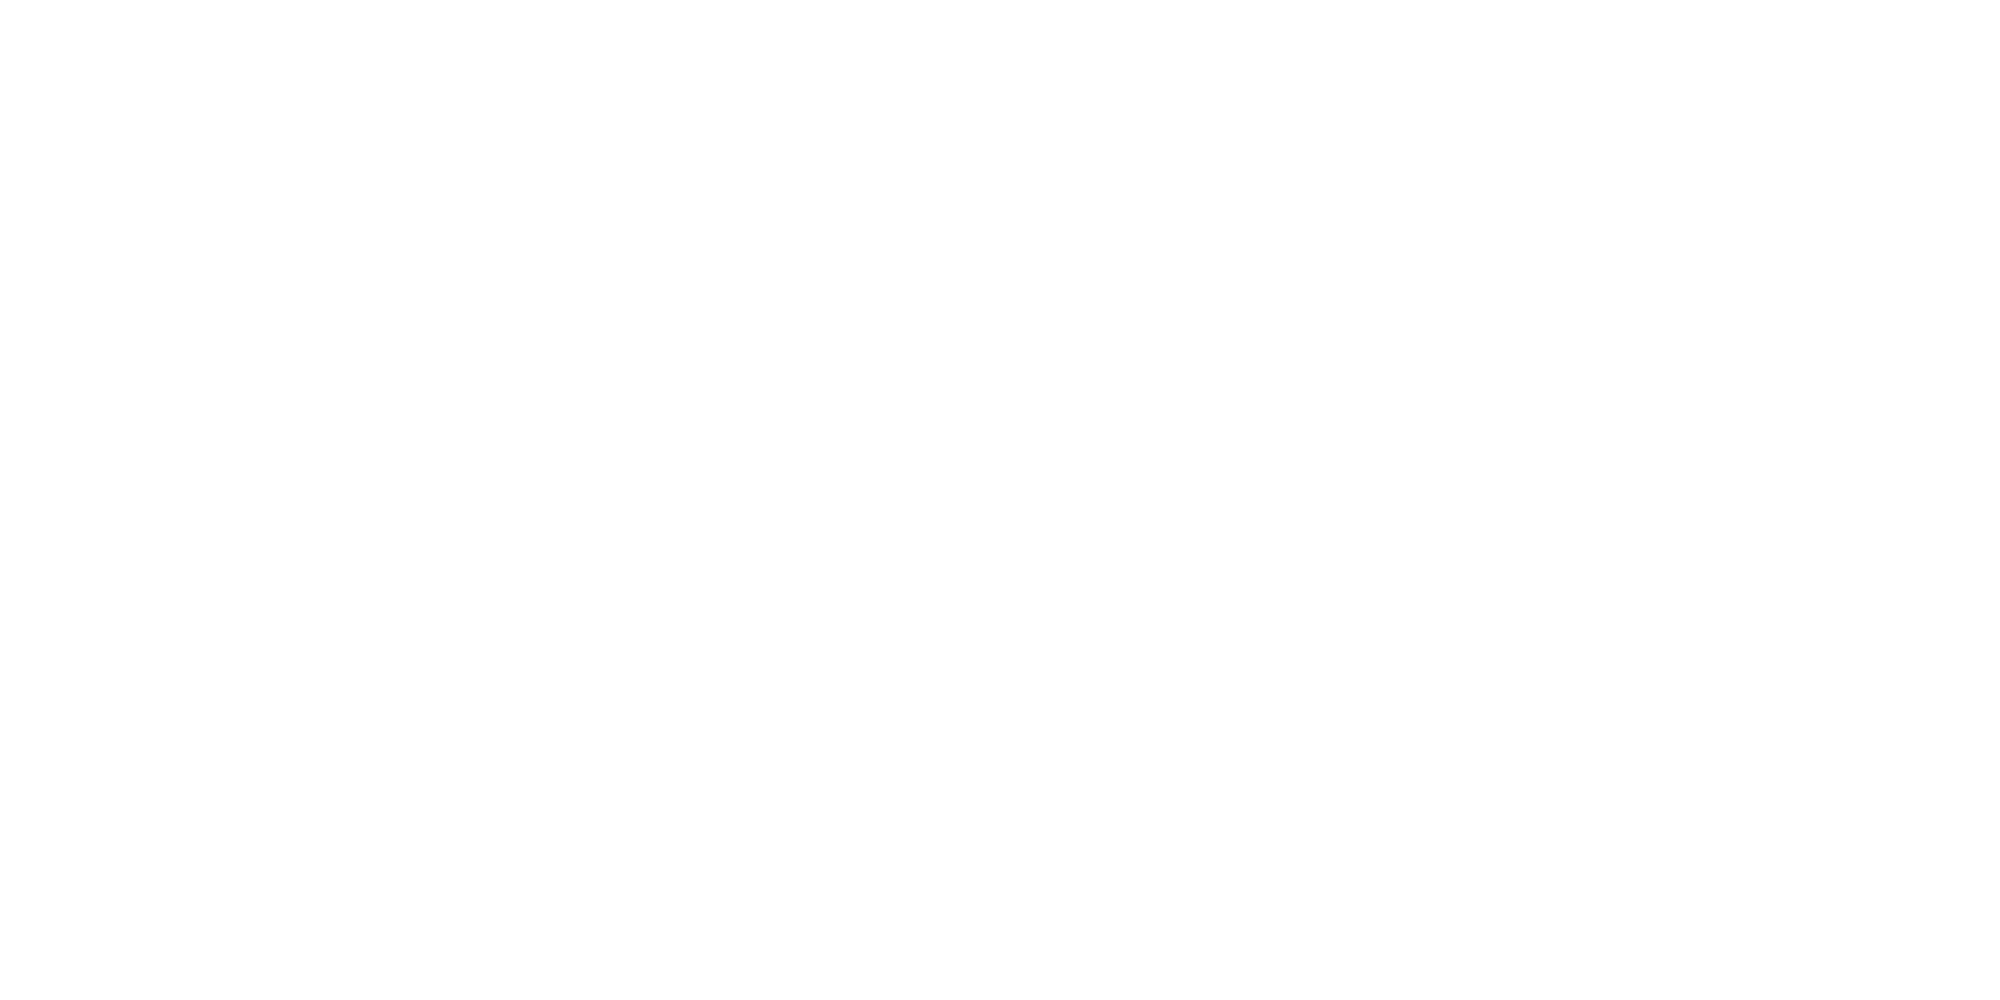

Text(0.5, 1.0, 'HD147513')

In [48]:
%matplotlib notebook
#Plots a figure and a set of axes for which we can use to plot our data.
fig,ax = plt.subplots(1,2,figsize=(10,5)) # this is making a figure for us to put two plots in

#Plot spectrum for HD122563
ax[0].plot(wave,flux) 
ax[0].set_ylim(0,1.1)
ax[0].set_title('HD122563')

#Do the same for HD147513
ax[1].plot(sol_wave,sol_flux)
ax[1].set_ylim(0,1.1)
ax[1].set_title('HD147513')

##### FOR  HDHD122563 #####

#ax[0].set_xlim(4845,4885)

##### FOR HD147513 #####

#ax[1].set_xlim(4845,4885)


These spectra are high-resolution spectra that contain a large number of spectral lines.  They are normalised as explained in class, such that the blackbody curvature of the flux continuum are fit by a function and divided out.  As a result, the blackbody continuum of each star is set to equal 1.0 (or close to this value). 

The rectangle icon below the plot can be used to zoom in on each spectrum.  Click the icon and use the cursor to draw a rectangle around the area you want to zoom.  Note - the home button resets the plot to the original view.  Practice zooming in on the spectra until you're able to get just a single absorption line on the plot.
<br>

<font color='Orange'> Alternatively, you can remove the '#' from the bottom lines of the code in the box above the plots to automatically zoom in on a specified wavelength range.

These lines are:

ax[0].set_xlim(4845,4885)

ax[1].set_xlim(4845,4885)</font>

(As a note, these values are the default values for your record, if you change them and want to return back).

Uncomment the two '#'s from the code in the box located above the plots and test this now.  The default values zoom in on the H-beta line of hydrogen.  This is a Balmer line and it's the Fraunhofer "F" line.  You'll notice right off that the appearance of this feature is different in the two spectra.

Editing these lines of code can be much more convenient to isolate a single absorption line in these high resolution spectra for some people, as compared to using the rectangle icon. 

Finally, you can drag the dark small triangle in the lower right-hand corner of the plots to expand or shrink them. 

<br>

<font color='Orange'> Explore and investigate the spectra for both stars above before answering the following questions </font> 



# PART 1 - SPECTRAL TYPE CLASSIFICATION

Using the plots above, let's look at how these two spectra differ qualitatively.  Get familiar with identifying the wavelengths of spectral lines.  To do this, zoom in on the spectrum to isolate a line.  Hold your cursor over the bottom centre of the line trough and note the corresponding wavelength (the value of x) indicated in the lower right hand corner of the plot window.  

Find the lines found by Fraunhofer as described in class for each spectrum: the Balmer lines H-alpha, H-beta, and H-gamma (Fraunhofer C, F, and G lines), Calcium H and K lines, and the Sodium D lines.  You'll need to look up the wavelengths of these features and then zoom in on those lines.  Note: only one spectrum extends sufficiently far in wavelength space to reach H-alpha. 

<b>Question 1:</b>  What is your best guess on the spectral type of HD147513?  This is your guess based only on the plot above and your review of the spectral lines (and not something you looked up online).  Hint:  You don't have the blackbody curve information to determine its temperature, but what significant spectral features come and go in strength with the OBAFGKM spectral types?  Make reference to these spectral features and their strengths to justify your answer.  Similarly, what is your best guess on the spectral type of HD122563?  Describe differences in the features between the two spectra.  

<font color='red'> WRITE ANSWER IN ANSWER BOOKLET </font> 


<b>Question 2:</b> Name the three things, as discussed in class, that contribute to the width/profile of an absorption line?  What is the dominant process affecting the spectral lines that you're observing in the plots? 

<font color='red'> WRITE ANSWER IN ANSWER BOOKLET </font> 

# Part 2 - RADIAL VELOCITY

The plotting tool below will be used to measure the radial velocity of the star HD122563 (how fast it's moving toward or away from us).  You can zoom in on a known line feature and record the observed wavelength at line centre.  Reminder, hold the cursor over the bottom of the absorption feature trough to see the wavelength.  

Set the x-axis range "ax.set_xlim" to be about 10 angstroms or so shortward and longward of the Balmer line wavelength, given in the box below the plot.  You can continue to zoom in on the line to obtain a more accurate measurement.

The box below is set to zoom in on H $\beta$.  You can input other wavelengths to zoom in on other features.

<IPython.core.display.Javascript object>


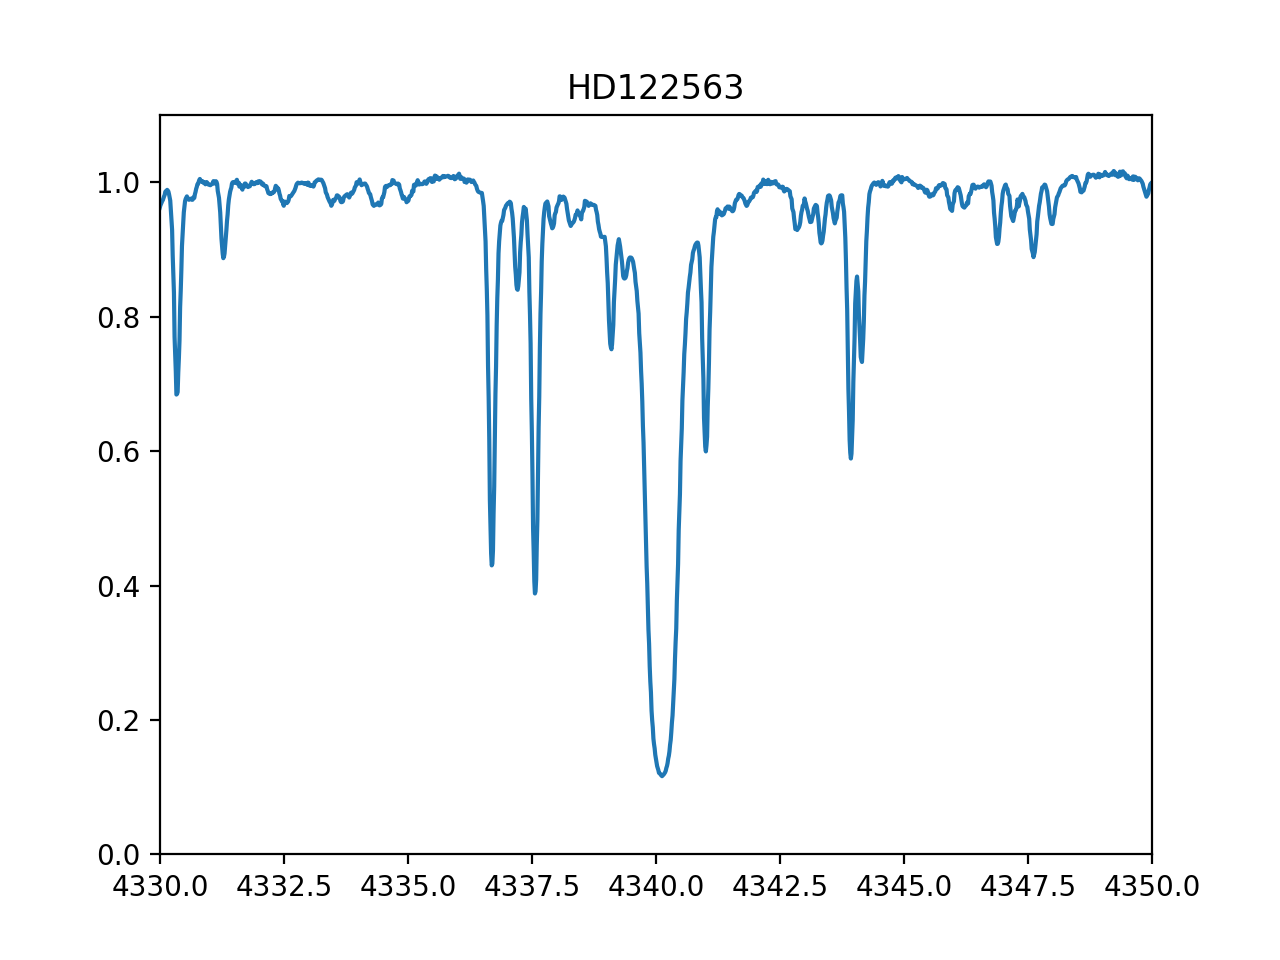

(4330, 4350)

In [49]:
# FIRST DO IT FOR HD122563

%matplotlib notebook
fig,ax = plt.subplots()
ax.plot(wave,flux)
ax.set_ylim(0,1.1)
ax.set_title('HD122563')

# You can use the following command to automatically zoom in on a wavelength range 
# or use the zoom to rectangle button below.

# Here, the wavelength of H-beta is inserted - "4861.33" and the zoom is "- 10" and "+ 10".

#ax.set_xlim(4861.33 - 10,4861.33 + 10)
ax.set_xlim(4340-10, 4340+10)

The radial velocity can be found by comparing the observed wavelength with the rest wavelength for that feature.  The following expression is used to compute the radial velocity.  

<img src="V.png" >

The code in the box below will perform this calculation for your measurements.    

As there will be some small error measuring the lines this way ("by eye"), we will act to minimise the error by 
measuring two Balmer series lines and take their average to calculate the radial velocity of each star.

H $\beta$ = 4861.33 angstrom

H $\gamma$ = 4340.46 angstrom

<br>
<font color='Orange'> Take your observed wavelength values found above for each of the three Balmer 
lines and insert them into "lamb_obs_Hx = " lines of the code below. </font> 

<br>
<font color='Green'>  Press 'Shift' + 'Enter' in below box </font>

In [36]:
# Compute the radial velocity here:
# Do this for all two lines to get an average.

c = 2.99793e5
lamb_obs_Hb = 4860.97  # replace this value with your observed value
lamb_rest_Hb = 4861.33

V_rad_Hb = c * (lamb_obs_Hb - lamb_rest_Hb)/(lamb_rest_Hb)

lamb_obs_Hg = 4340.08# replace this value with your observed value
lamb_rest_Hg = 4340.46

V_rad_Hg = c * (lamb_obs_Hg - lamb_rest_Hg)/(lamb_rest_Hg)

V_rad = (V_rad_Hb + V_rad_Hg) / 2

print(V_rad)

-24.223594082924393


This equation can be re-arranged to apply a shift to the observed spectrum to place it at rest.  Hint: make sure you use the correct sign to the radial velocity to produce the correct redshift or blueshift as appropriate (see note in the code below).  You can check you've made the correct adjustment by re-plotting the spectrum in the window below.

<br>
<font color='Green'>  Press 'Shift' + 'Enter' in below box </font>


<IPython.core.display.Javascript object>


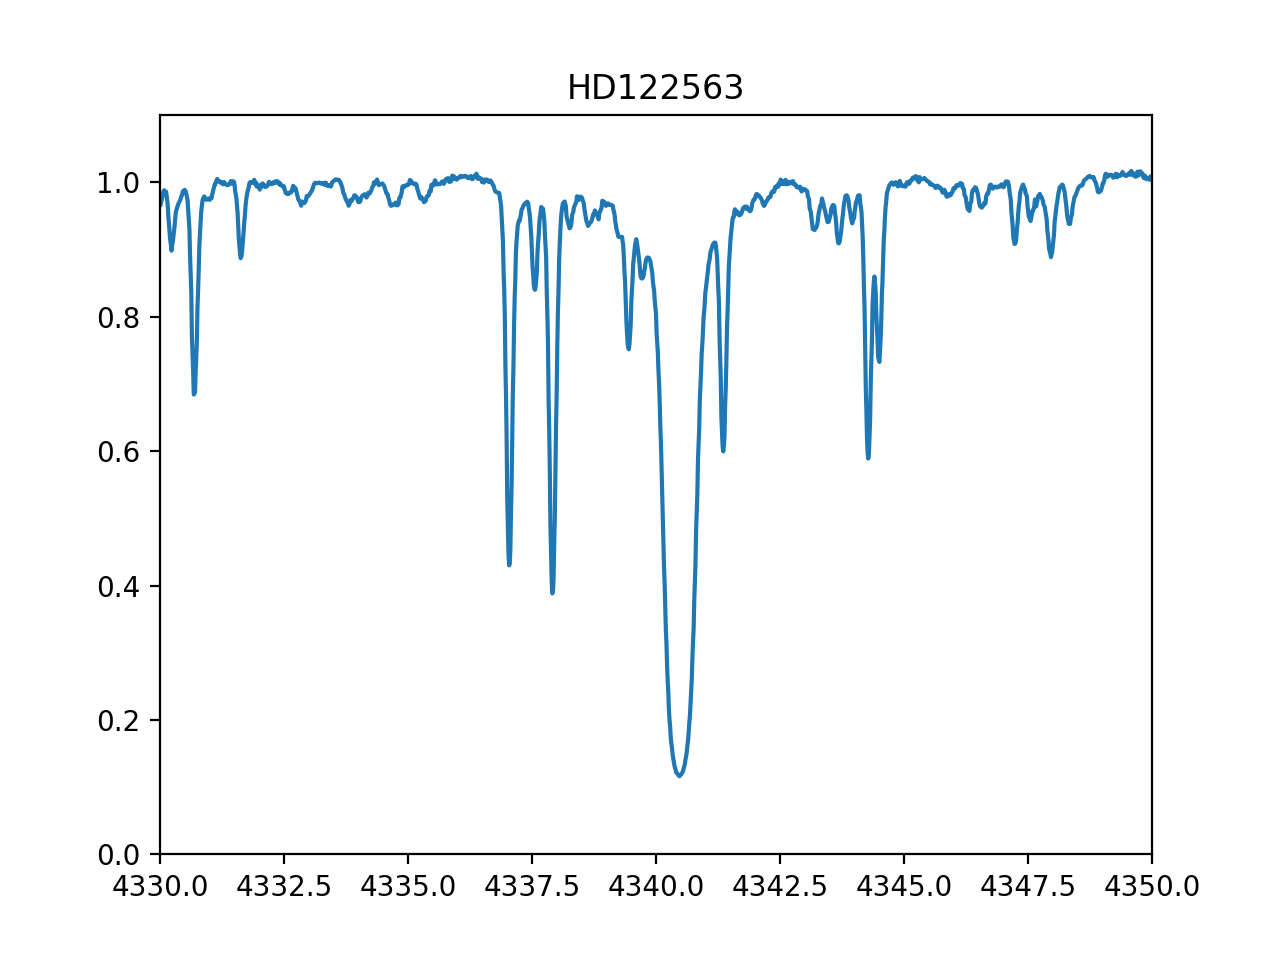

(4330, 4350)

In [50]:
# Make the radial velocity correction to the wavelength array for # FIRST DO IT FOR HD122563

wave = wave - wave*V_rad/c  

%matplotlib notebook
fig,ax = plt.subplots()
ax.plot(wave,flux)
ax.set_ylim(0,1.1)
ax.set_title('HD122563')

# You can use the following command to automatically zoom in on a wavelength range 
# or use the zoom to rectangle button below

ax.set_xlim(4330,4350)

### Now do all the radial velocity steps for star HD147513.

<IPython.core.display.Javascript object>


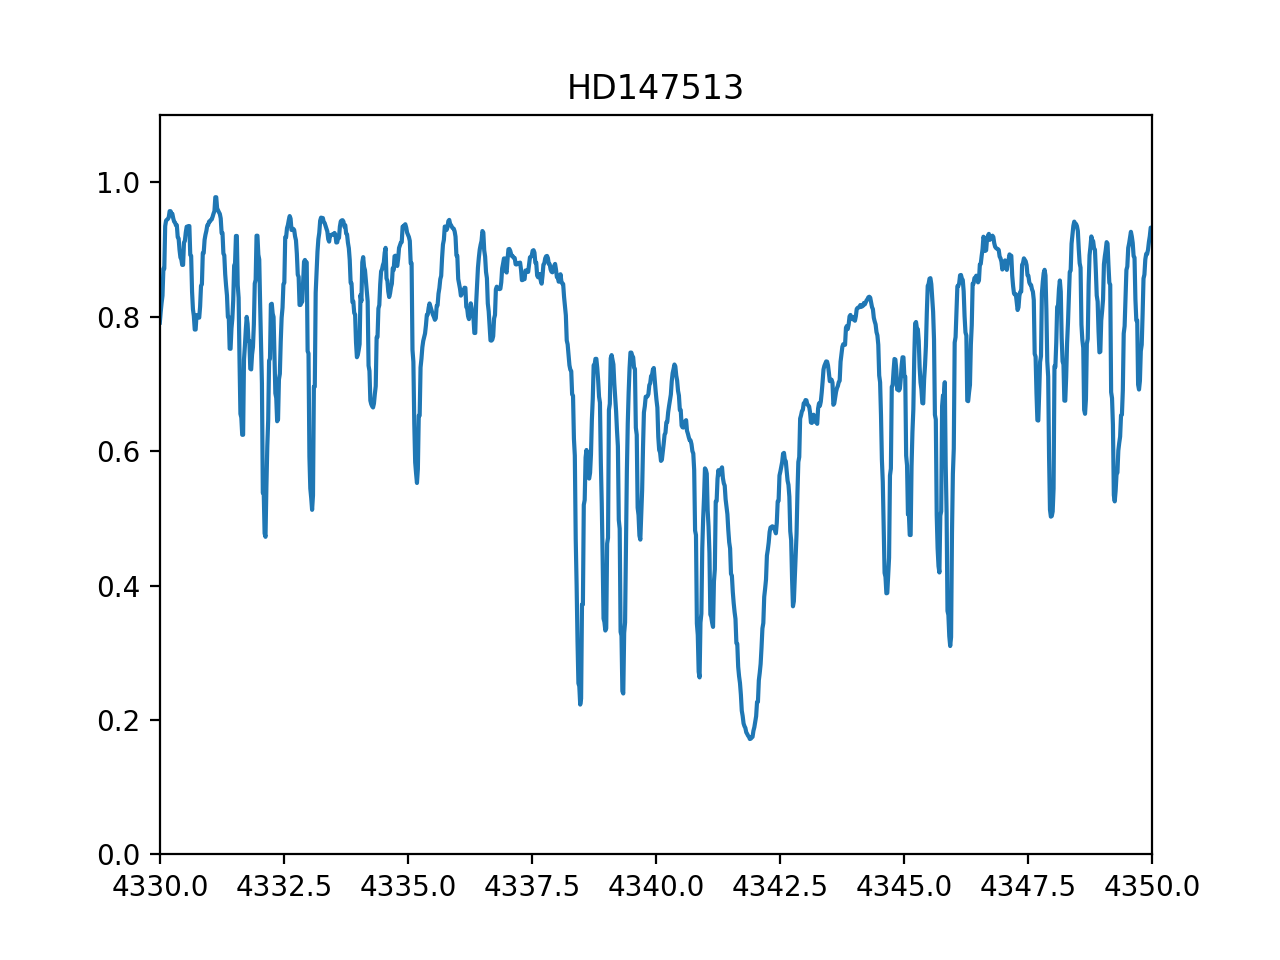

(4330, 4350)

In [51]:
# PLOT BALMER LINES FOR HD147513 HERE

%matplotlib notebook
fig,ax = plt.subplots()
ax.plot(sol_wave,sol_flux)
ax.set_ylim(0,1.1)
ax.set_title('HD147513')

# You can use the following command to automatically zoom in on a wavelength range 
# or use the zoom to rectangle button below

ax.set_xlim(4340-10,4340+10)

In [40]:
# Compute the radial velocity for HD147513 here:
# Do this for the two lines to get an average.

c = 2.99793e5
lamb_obs_sol_Hb = 4863  # replace this value with your observed value
lamb_rest_sol_Hb = 4861.33

V_rad_sol_Hb = c * (lamb_obs_sol_Hb - lamb_rest_sol_Hb)/(lamb_rest_sol_Hb)

lamb_obs_sol_Hg = 4341  # replace this value with your observed value
lamb_rest_sol_Hg = 4340.46

V_rad_sol_Hg = c * (lamb_obs_sol_Hg - lamb_rest_sol_Hg)/(lamb_rest_sol_Hg)

V_rad_sol = (V_rad_sol_Hb + V_rad_sol_Hg) / 2

print(V_rad_sol)

70.14229319987673


<IPython.core.display.Javascript object>


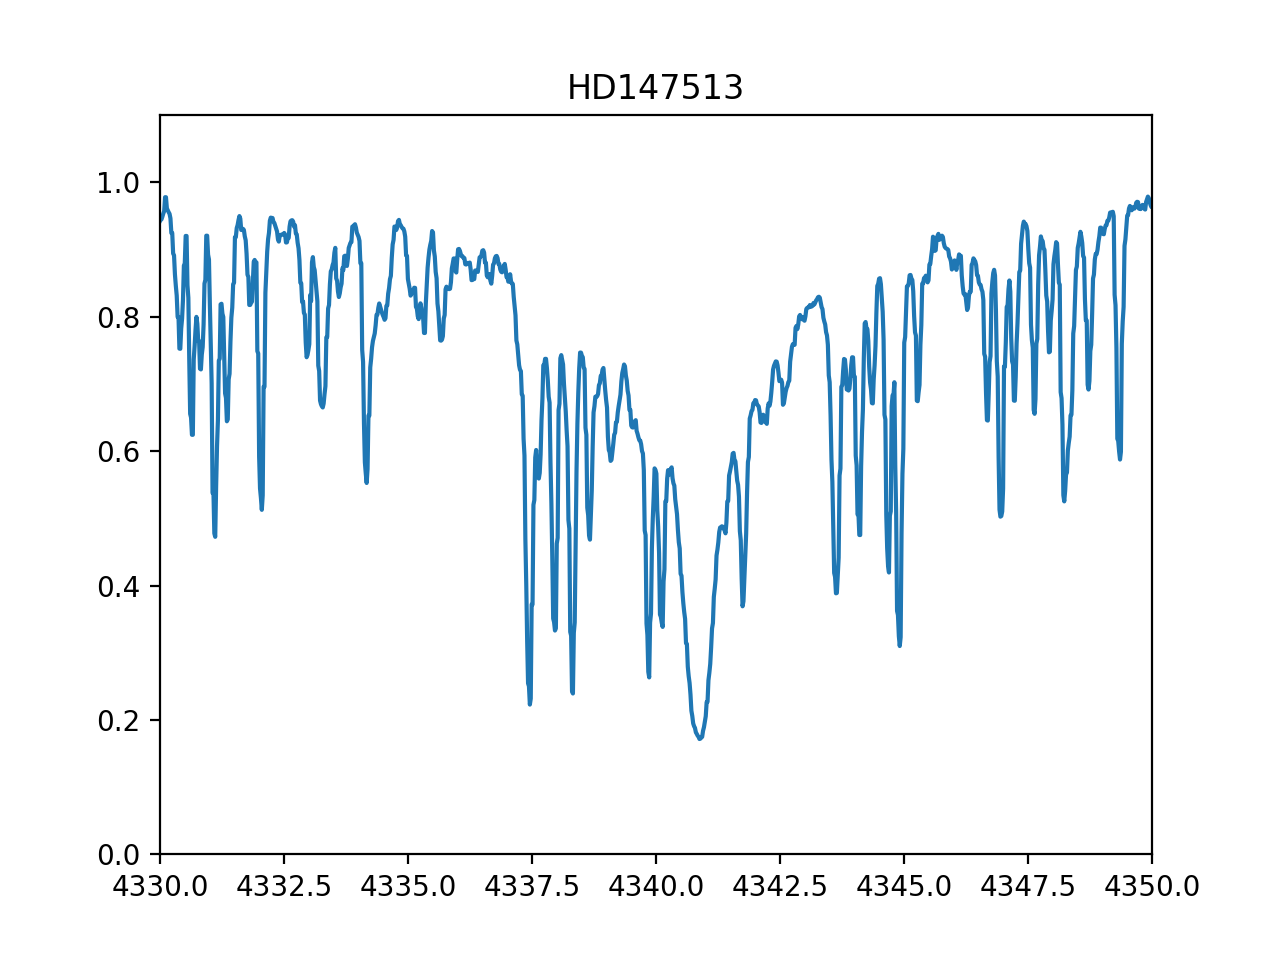

(4330, 4350)

In [52]:
#Make the radial velocity correction to the wavelength array

sol_wave = sol_wave - sol_wave*V_rad_sol/c  

%matplotlib notebook
fig,ax = plt.subplots()
ax.plot(sol_wave,sol_flux)
ax.set_ylim(0,1.1)
ax.set_title('HD147513')

# You can use the following command to automatically zoom in on a wavelength range 
# or use the zoom to rectangle button below

ax.set_xlim(4330,4350)

<b>Question 3:</b>  Why do you think stars are moving toward or away from us?  Describe two reasons why this could be the case.  Radial velocities shift the spectrum (stretching or compressing them) along the wavelength axis.  What happens to a spectrum of a source that is spinning rapidly?

<font color='red'> WRITE ANSWER IN ANSWER BOOKLET </font> 

# PART 3 - METALLICITY

Metallicity is a measure of the 'metal' or heavy element content of a star compared to hydrogen.  Metal enrichment happens over cosmic time and is seen in later generations of stars.  The Sun is quite metal rich compared to older stars found in (for example) the Galactic bulge or halo.  In this section, we are going to use iron to measure the metallicity of HD122563 and HHD147513 and compare them to the solar value.

<b>Question 4:</b>  Iron content compared to hydrogen is often used as a proxy for metallicity.  Explain why this is done, considering the spectra in this assignment and stellar spectra in general.  Hint:  Think about the wavelengths under study and the appearance of the spectra, such as the number of absorption lines and various transitions.  List at least one reason why iron **is not** a good proxy.

<font color='red'> WRITE ANSWER IN ANSWER BOOKLET </font> 

### Measuring metallicity 

In this part we are going to measure the equivalent width (EW) of iron lines to calculate the [Fe/H], an abbreviated notation for the Fe/H ratio compared to the solar value on a log scale. 

<br>
<font color='Blue'> **NOTE:  You must check your radial velocity corrections for HD122563 and HD147513 in order for the remainder of the assignment to appear correctly.  That is, you will see the absorption lines from this point onward to appear offset if your radial velocity correction is not done reasonably well.** </font>

You can measure the EW using the plot_n_measure_EW function below.  You can call it to measure the EW of the Na I "D" line shown in the plot.  For those interested, you can use this as a quantitative measure to compare the Na I line of HD122563 against the Sun's.

In the first row of the code below, you will need to enter the wavelengths corresponding to the lower edge and upper edge of the absorption line feature where it meets the continuum.  Keep in mind that the 'continuum' is where the spectrum reaches 1.0 (or roughly 1.0).  Some absorption lines are blended with others, such that the line under investigation never reaches 1.0.  In that case, you may not want to use that line for this asssignment, or ensure that you've considered this in your result and conclusions.  Occasionally, you'll find that the continuum reaches above 1.0, as a result of poor continuum fitting or emission from the feature.  You may not want to use those lines either.  

Here, we show the partially blended Na I 5889.95 line.  Example values of the lower and upper wavelengths to measure the EW are 5889.65 and 5890.25 as entered in the square bracket, e.g.:

plot_n_measure_EW_spectrum(wave,flux,[5889.65,5890.25])

You might see how this choice of lower and upper wavelengths has estimated the EW by aiming to include only the absorption by the single Na I line and avoiding the inclusion of the nearby and blended (weaker) absorption.  This is not ideal and you should try to choose absorption lines that are 'clean' and show no evidence of blending.

The chosen wavelength values need to also be placed in the midpoint function line of the code: 

midpoint = (5889.65+5890.25)/2

When computing EW values, you will find different values for these wavelengths for your absorption lines, but the concept is the same.  You will insert the wavelengths corresponding to the lower and upper wavelengths of the absorption line feature, as detailed above, in order for the code to compute the EW.

**Note** that the output is in **milliAngstroms (mA)** and we will be using these units for the next section.

<IPython.core.display.Javascript object>


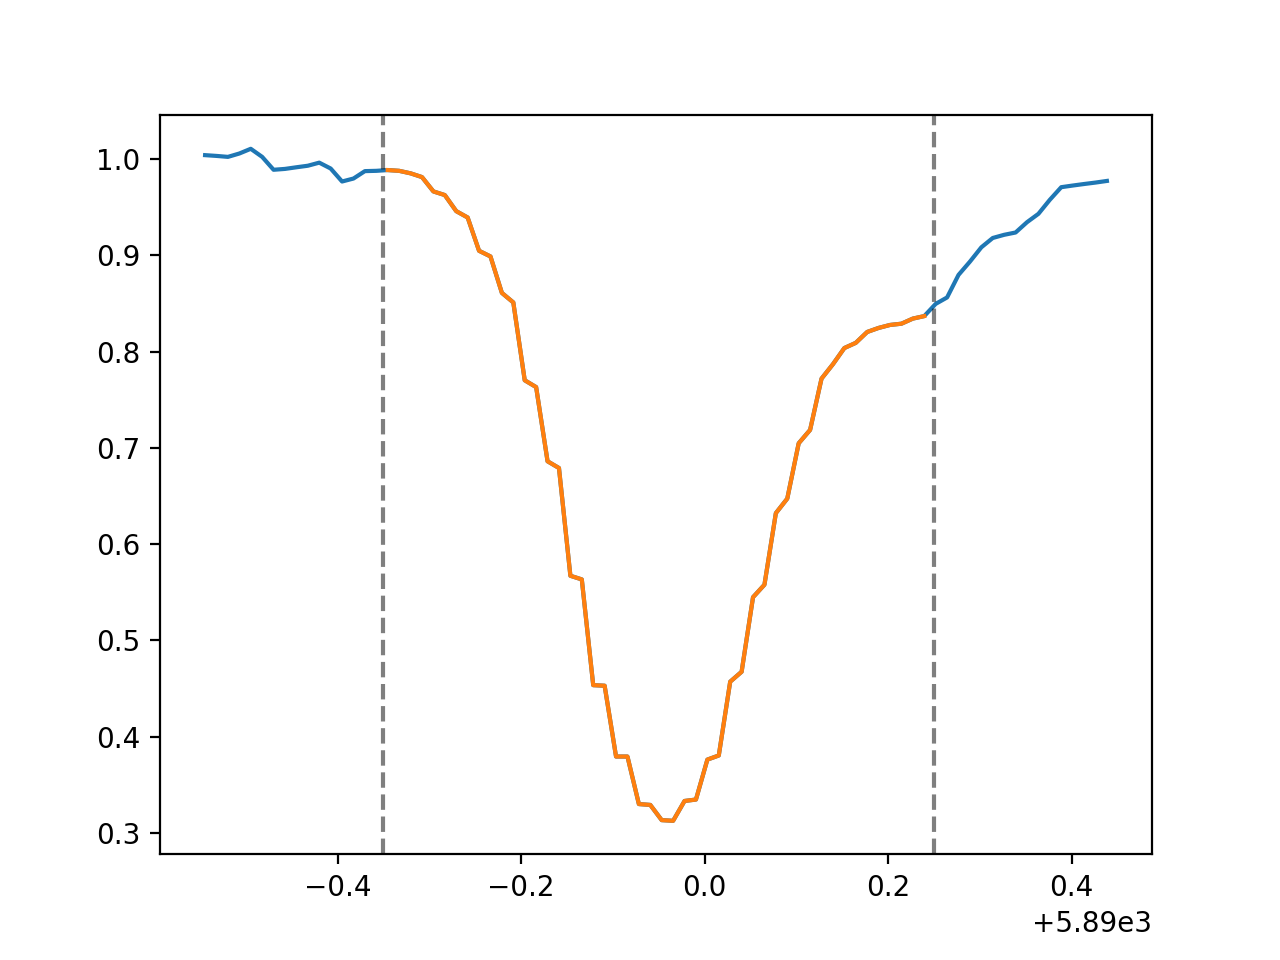

Equivalent Width = 0.2 A
midpoint wavelength: 5889.95


In [53]:
plot_n_measure_EW_spectrum(wave,flux,[5889.65, 5890.25])
midpoint = (5889.65 + 5890.25)/2 
print('midpoint wavelength: ' + str(midpoint))

The table below lists some atomic transitions of the element iron.  Listed are the wavelength of the line (in angstroms), its atomic number, and the oscillator strength (the statistical probability of that transition). 

Pick 3 out of the 5 Fe lines from the line list below and measure their EWs, starting off with the HD122563 spectrum below.

<img src="newtable.png">

In [55]:
## HERE ARE ALL THE VALUES ALREADY SAVED AS VARIABLES FOR YOU ##

'''You can now use these helpful variables to do the rest of 
    the notebook '''

### DON"T EDIT THIS SECTION ###


line1_wave =   5497.518 
line1_f = 1.01

line2_wave = 5956.705
line2_f =  0.86 

line3_wave = 4383.547
line3_f = 1.49

line4_wave = 5434.527 
line4_f = 1.01

line5_wave = 3887.049
line5_f = 0.92

line6_wave =  5445.042 
line6_f = 4.39 

<font color='Green'> Play around with the adjust left and right variables for each line until you are happy the selected section is measuring the whole EW </font>

In [1]:
### Enter your code here ## 

## HINT : You will need to play around with moving the star and stop of each 
# absorption line to get the fit only over the absorption line 

## Adjust the - + values on either side of the wavelength value in the
#-- equations to fit where the asportions. 

wavelength1 = line1_wave
adjust_left = 1     #ENTER VALUE HERE 
adjust_right = 1      #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(wave,flux,[wavelength1 - adjust_left ,wavelength1 + adjust_right])
midpoint1 = ( (wavelength1 - adjust_left) +(wavelength1 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(midpoint1))

wavelength2 = line2_wave
adjust_left =  1     #ENTER VALUE HERE 
adjust_right =  1    #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(wave,flux,[wavelength2 - adjust_left ,wavelength2 + adjust_right])
midpoint2 = ( (wavelength2 - adjust_left)  +(wavelength2 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(midpoint2))

wavelength3 = line3_wave
adjust_left =  1     #ENTER VALUE HERE 
adjust_right = 1     #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(wave,flux,[wavelength3 - adjust_left ,wavelength3 + adjust_right])
midpoint3 = ( (wavelength3 - adjust_left)  +(wavelength3 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(midpoint3))

wavelength4 = line4_wave
adjust_left =  1    #ENTER VALUE HERE 
adjust_right = 1    #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(wave,flux,[wavelength4 - adjust_left ,wavelength4 + adjust_right])
midpoint4 = ( (wavelength4 - adjust_left)  +(wavelength4 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(midpoint4))

wavelength5 = line5_wave
adjust_left = 1    #ENTER VALUE HERE 
adjust_right = 1   #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(wave,flux,[wavelength5 - adjust_left ,wavelength5 + adjust_right])
midpoint5 = ( (wavelength5 - adjust_left)  +(wavelength5 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(midpoint5))

wavelength6 = line6_wave
adjust_left = 1      #ENTER VALUE HERE 
adjust_right = 1      #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(wave,flux,[wavelength6 - adjust_left ,wavelength6 + adjust_right])
midpoint6 = ( ((wavelength6 - adjust_left)  +(wavelength6 + adjust_right) )/ 2.0)
print('midpoint wavelength: ' + str(midpoint6))


NameError: name 'line1_wave' is not defined

<font color='Orange'> Please entre your values for the three lines you have selected below as well as on the answer sheet </font>

In [16]:
EW_1_HD122563 =    #ENTER VALUE HERE 
lambda_HD122563_1 =    #ENTER VALUE HERE 
  
EW_2_HD122563 =      #ENTER VALUE HERE 
lambda_HD122563_2 =  #ENTER VALUE HERE 
  
EW_3_HD122563 =    #ENTER VALUE HERE 
lambda_HD122563_3 =  #ENTER VALUE HERE 



# Part 3 - Finding abundances 

We can now use these EWs to calculate the canonical value, epsilon, which is described below:

\begin{equation*}
\epsilon = 12 + log\left(\frac{N_{Fe}}{N_H}\right)
\end{equation*}

Epsilon can be used as a measure of the star's elemental abundance and can be used for comparisons between stars.  To compute this value, we need to find the column density of atoms for iron, N_Fe, or how many atoms are present in that sightline per square centimetre.  We will step through how to find this value below.


**For additional help and information, you may want to have a read through http://spiff.rit.edu/classes/phys440/lectures/curve/curve.html** 

You will use your measured EW from above and the 'curve of growth' plot below to determine the column density.  The Y axis is log(W/lambda), where 'W' is your EW in angstroms.  

The X axis is the column density in a functional form: log N f(lambda/5000 Angstroms). 

**Note** the line can be described by three equations as shown overlaid the plot.  The reason for this was described in class regarding the effects on EW from the different physical processes that broaden absorption lines.  

<img src="curveofgrowth_eqns.png" >



## Step 1. Find the value of Y: 

\begin{equation*}
Y = log10(\frac{EW}{\lambda})
\end{equation*}

Your EW values will automatically be placed in the code below to have it compute your Y-axis values on the plot.
These values are printed below the box.
<br>
<br>
** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>

In [18]:
## Example on Na
## USE THE BELOW EQUATION ## 
#  y = np.log10((EW/1000)/central_wavelength) 

#Y = np.log10((206.8/1000)/5892.948)
#print('Y value for Na: ' + str(Y))

## Do the same for your 3 to 5 Fe lines below below, where you place 
## your EW and lambda for each line: 

y_Fe_1_HD122563 = np.log10((EW_1_HD122563/1000) /lambda_HD122563_1)
print('Y value for Fe line 1: ' + str(y_Fe_1_HD122563))

y_Fe_2_HD122563 = np.log10((EW_2_HD122563/1000)/lambda_HD122563_2)
print('Y value for Fe line 2: ' + str(y_Fe_2_HD122563))

y_Fe_3_HD122563 = np.log10((EW_3_HD122563/1000)/lambda_HD122563_3)
print('Y value for Fe line 3: ' + str(y_Fe_3_HD122563))

Y value for Fe line 1: -4.633758400216713
Y value for Fe line 2: -4.462515217001597
Y value for Fe line 3: -5.74182546032892


## Step 2 Find the value of X:

Use the plot below to find the approximate value of log N f(lambda/5000).  You will trace your y-axis EW value horizontally to the curve and then trace it vertically downward to find its corresponding x-axis value.

**IF YOUR Y VALUE IS OFF THE PLOT** please use reasonable extrapolation for your estimated X value.

**In this example, our Y value is -4.46 annd we find the approximate x value, log N f(lambda/5000) = 13.35.**

<img src="curveofgrowth_ex.png" >

 ## Save your X values for Fe
 
<br> 
<font color='Orange'> ENTER YOUR VALUES BELOW </font>
<br> 
<font color='Green'> and Press 'Shift' + 'Enter' </font>

In [17]:
## Save your values for X_Fe below as variables to use later 

X_Fe_1_HD122563 =  #Enter your value here 
print('X value for Fe line 1: ' + str(X_Fe_1_HD122563))

X_Fe_2_HD122563 =  #Enter your value here 
print('X value for Fe line 2: ' + str(X_Fe_2_HD122563))

X_Fe_3_HD122563 =  #Enter your value here 
print('X value for Fe line 3: ' + str(X_Fe_3_HD122563))

SyntaxError: invalid syntax (<ipython-input-17-6f2acac0ed23>, line 3)

## Step 3 - The column density


<img src="egnnew.png" >

This value of N_Fe is in atoms per cm^2 
<br>
<br>
To solve for the values of N for each line strength you'll need to compute the following: 

\begin{equation*}
N = \frac{10^{X_{Value}}}{f \times \frac{\lambda}{5000} }
\end{equation*}

 ## TO DO - Find N _Fe
 
 <br>
<br>
** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>

In [58]:
# Your X and Lambda values are automatically carried over to the code below to find your value of N_Fe 
# for HD122563 for each of the three lines.

N_Fe_HD122563_1 = 10**(X_Fe_1_HD122563)/(line1_f*(lambda_HD122563_1/5000))
print('N value for Fe line 1: ' + str(N_Fe_HD122563_1))

N_Fe_HD122563_2 = 10**(X_Fe_2_HD122563)/(line2_f*(lambda_HD122563_2/5000))
print('N value for Fe line 2: ' + str(N_Fe_HD122563_2))

N_Fe_HD122563_3 = 10**(X_Fe_2_HD122563)/(line3_f*(lambda_HD122563_2/5000))
print('N value for Fe line 3: ' + str(N_Fe_HD122563_3))


N value for Fe line 1: 4565484574732.794
N value for Fe line 2: 66811548523948.92
N value for Fe line 3: 38562370288990.66


 # <font color='Blue'> Now redo the same steps and find the value for the solar twin HD147513 </font>

We will start you off ... 

<font color='Green'> Play around with the adjust left and right variables for each line until you are happy the selected section is measuring the whole EW </font>

<IPython.core.display.Javascript object>


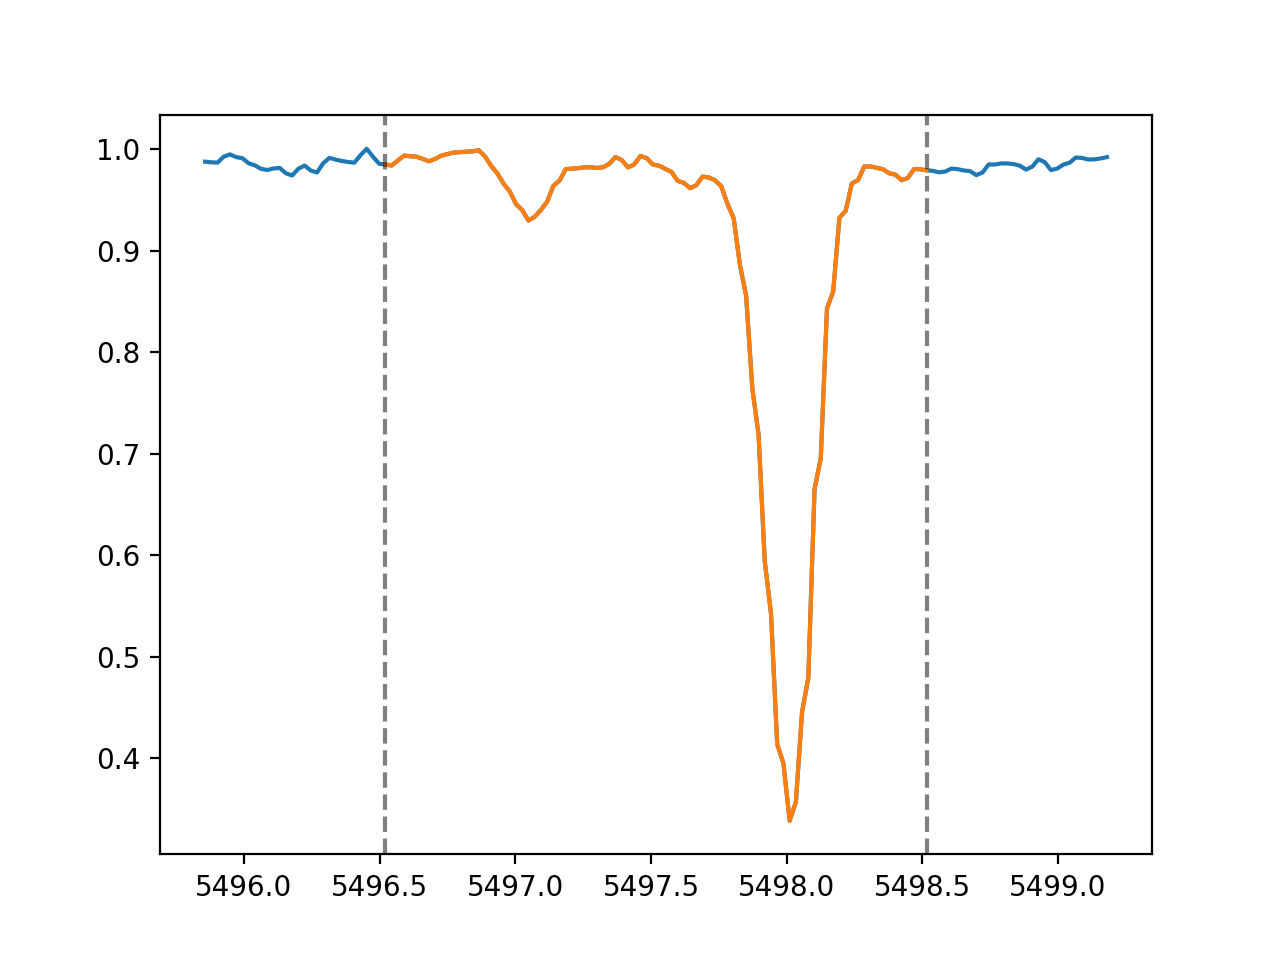

Equivalent Width = 0.2 A
midpoint wavelength: 5497.518


<IPython.core.display.Javascript object>


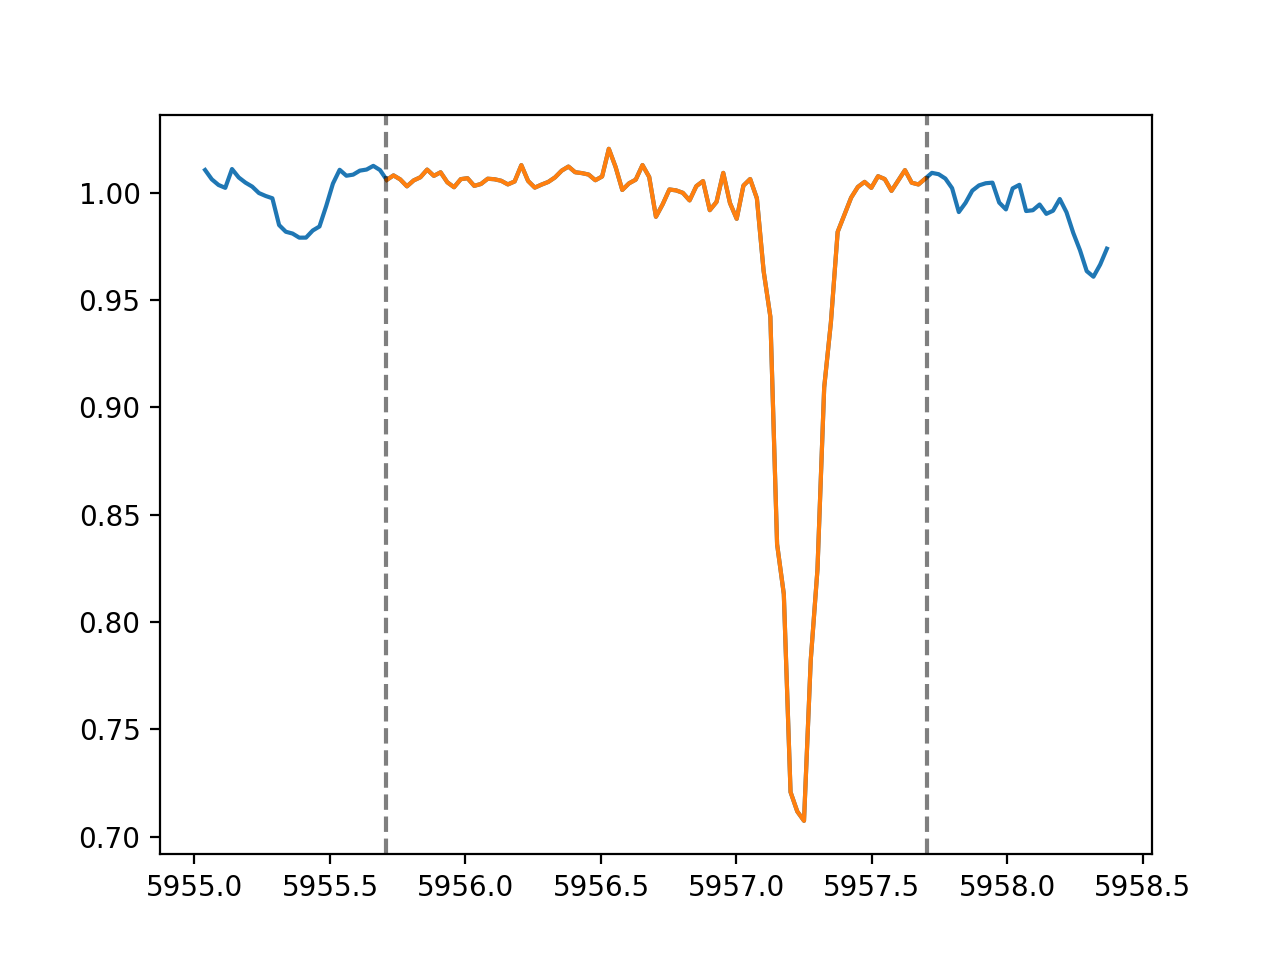

Equivalent Width = 0.0 A
midpoint wavelength: 5956.705


<IPython.core.display.Javascript object>


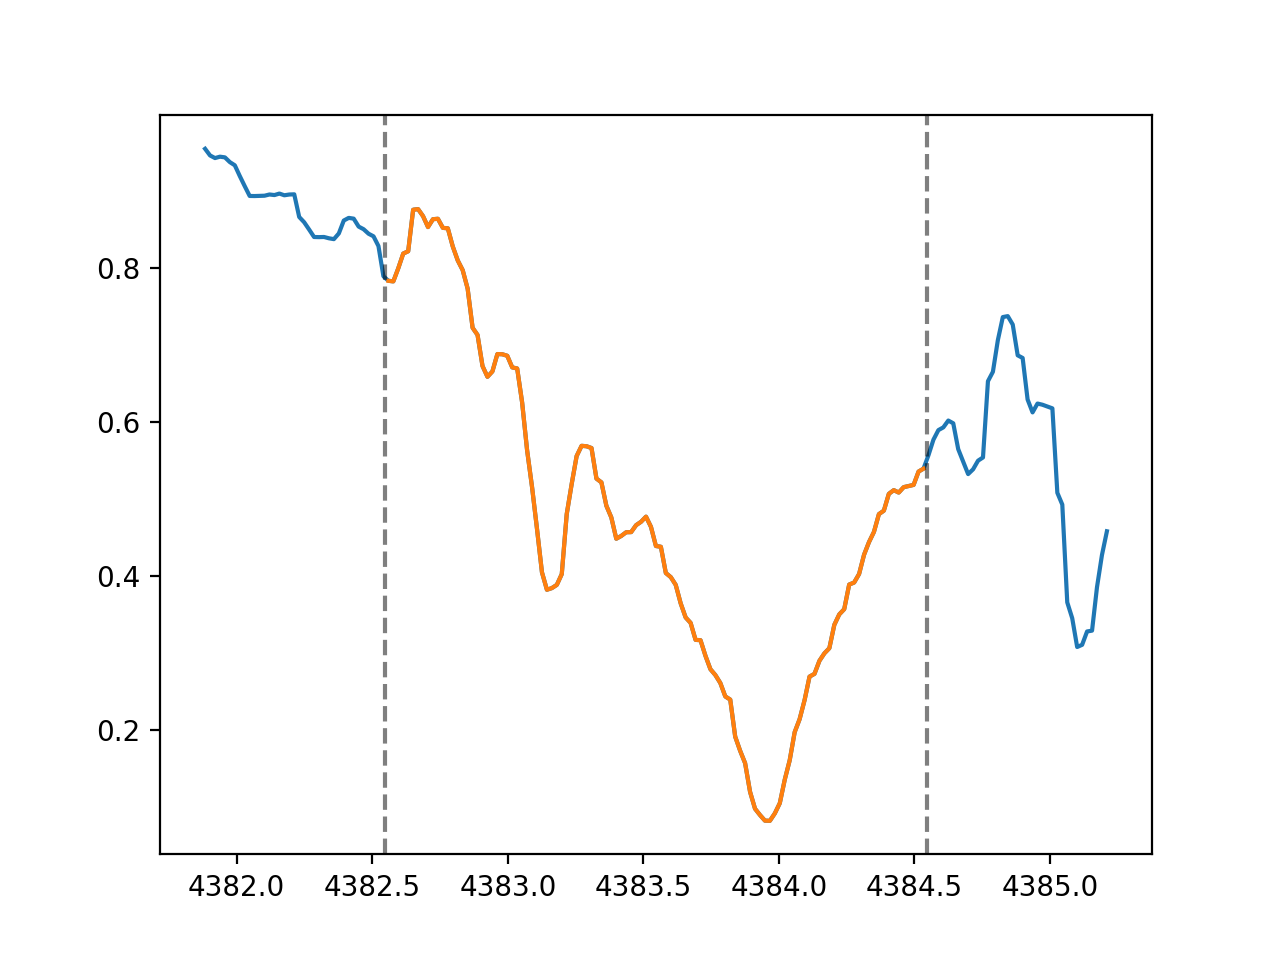

Equivalent Width = 1.0 A
midpoint wavelength: 4383.547


<IPython.core.display.Javascript object>


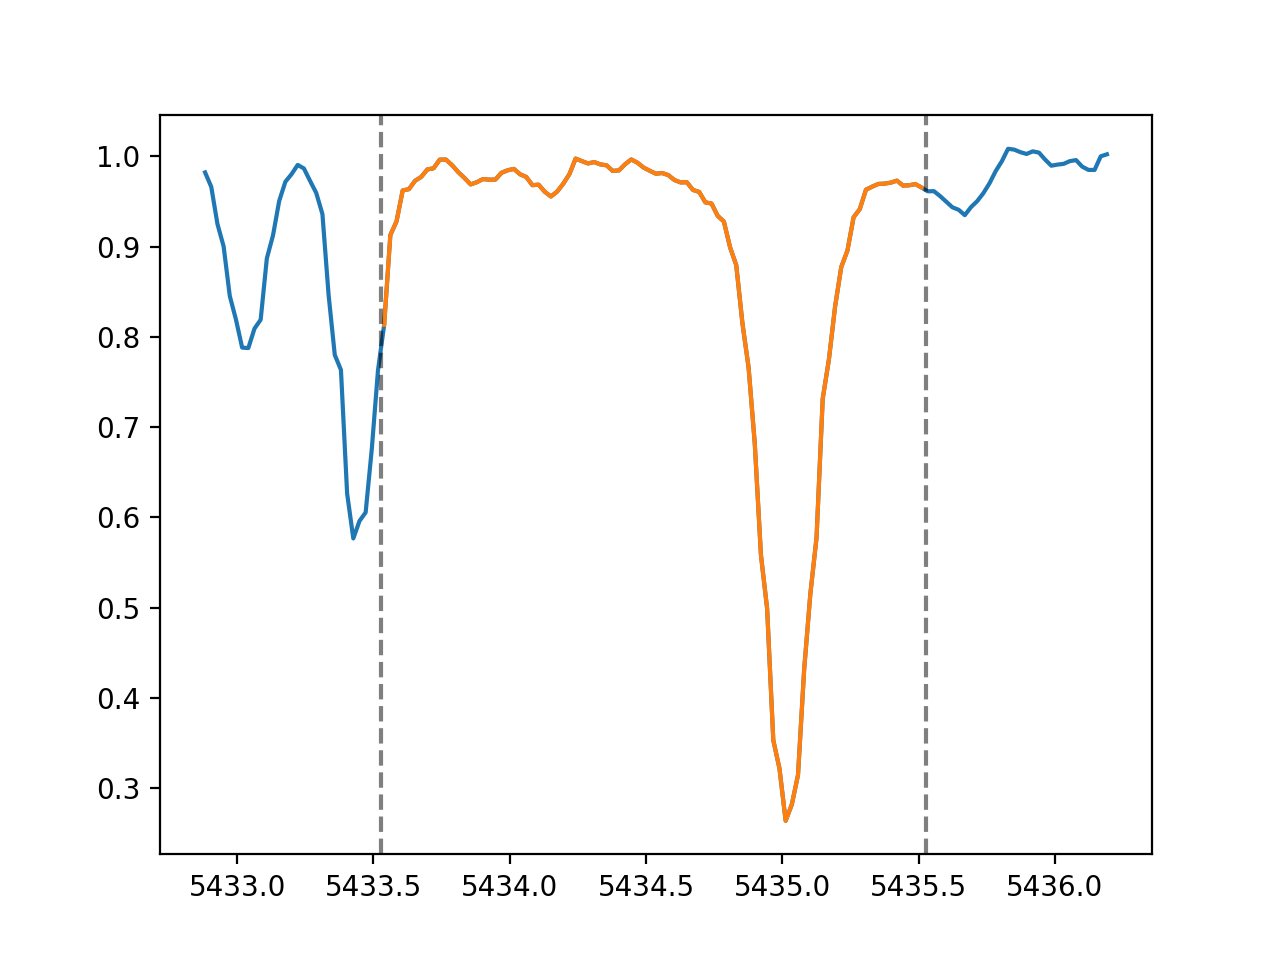

Equivalent Width = 0.2 A
midpoint wavelength: 5434.527


<IPython.core.display.Javascript object>


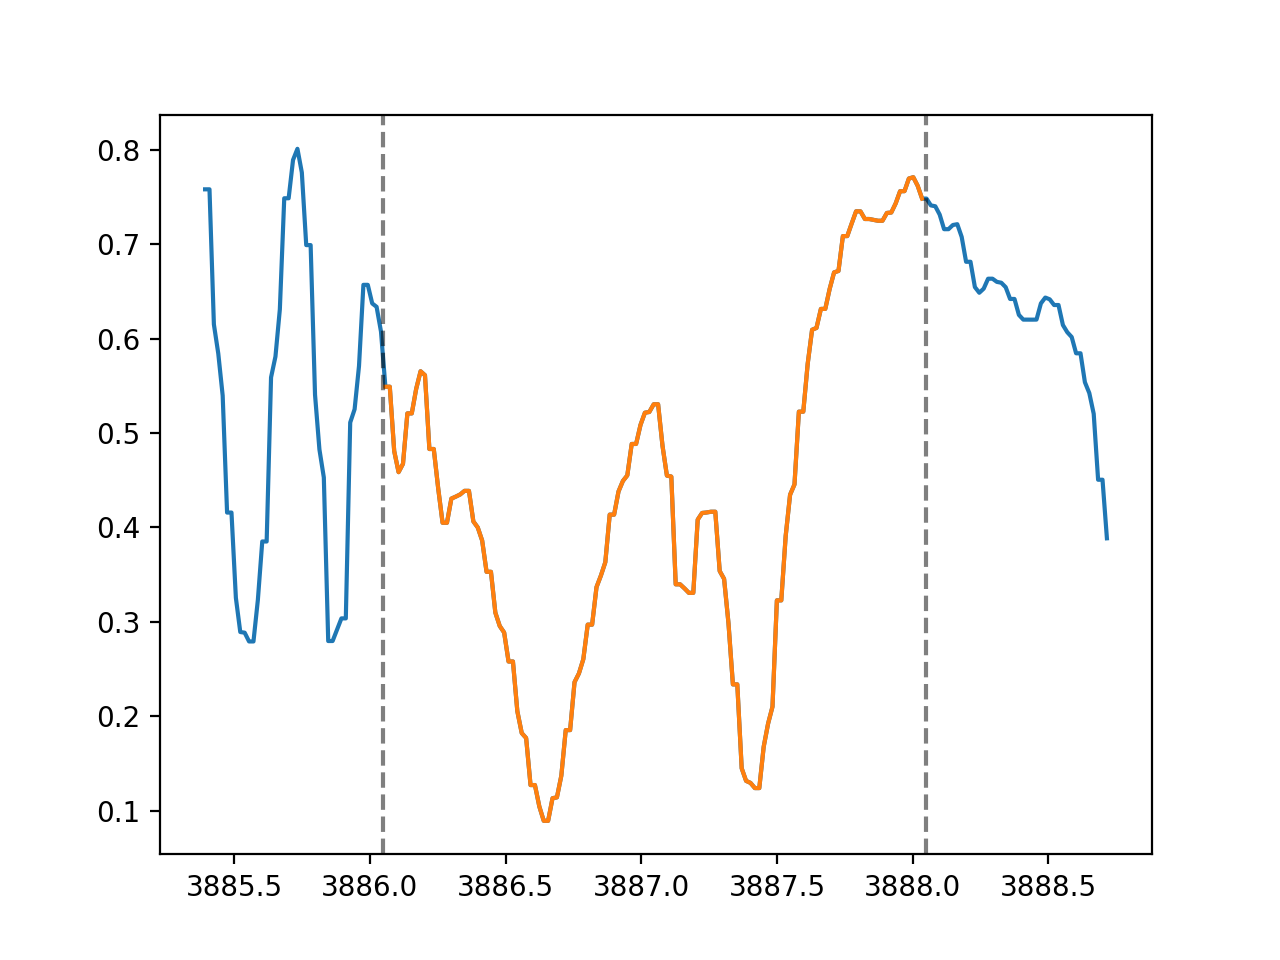

Equivalent Width = 1.1 A
midpoint wavelength: 3887.049


<IPython.core.display.Javascript object>


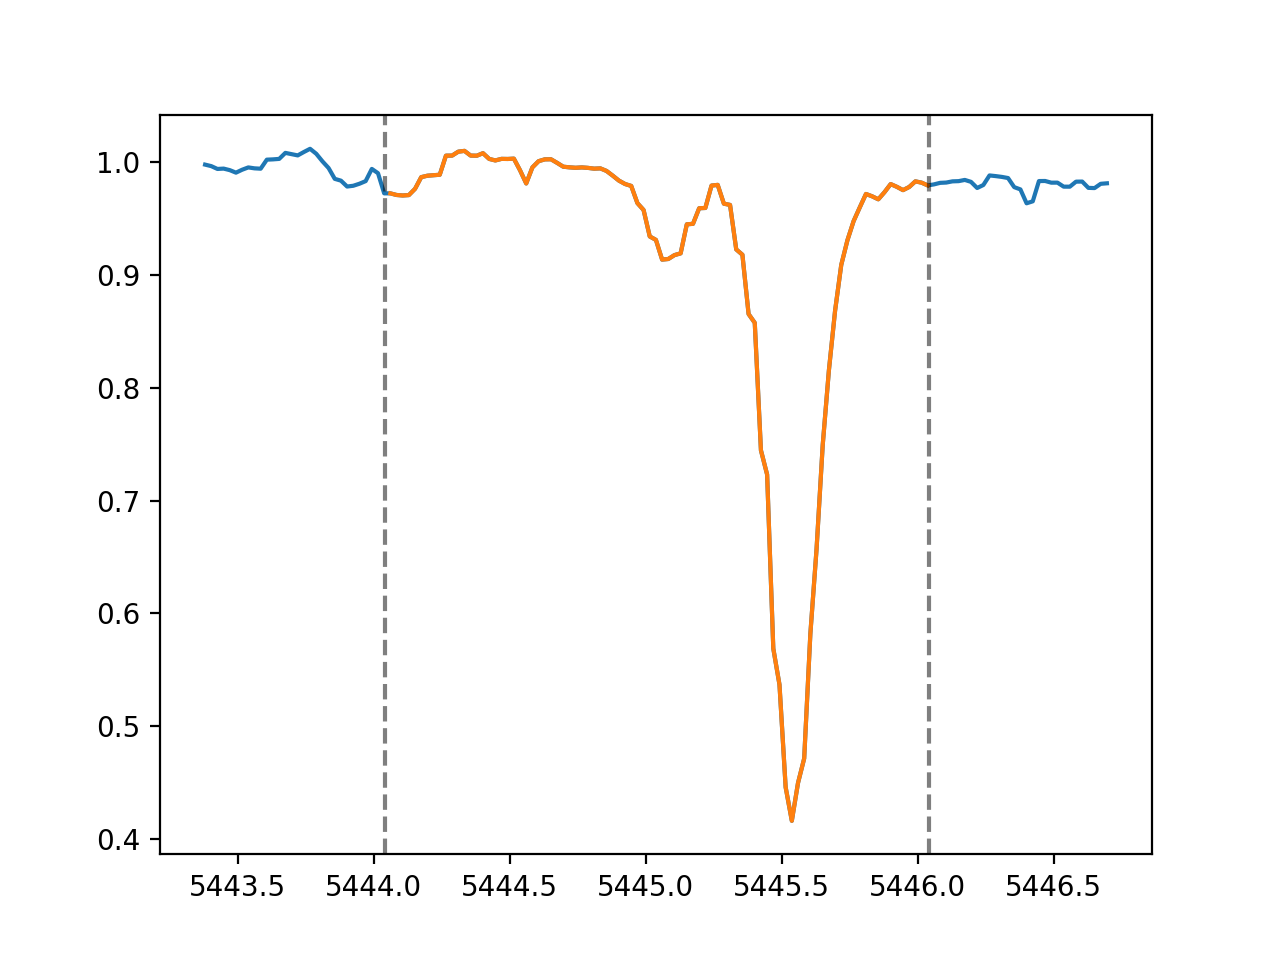

Equivalent Width = 0.2 A
midpoint wavelength: 5445.042


In [57]:
## do the same steps 

# Pick 3 to 5 Fe lines from the line list for the solar twin 
# hint: plot_n_measure_EW_spectrum(sol_wave,sol_flux,[,]) 

## LINE 1 ###
wavelength1 = line1_wave
adjust_left = 1 #ENTER VALUE HERE 
adjust_right = 1#ENTER VALUE HERE 
plot_n_measure_EW_spectrum(sol_wave,sol_flux,[wavelength1 - adjust_left,wavelength1 + adjust_right])
lambda_HD147513_1 = ( (wavelength1 - adjust_left) + (wavelength1 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(lambda_HD147513_1))

## LINE 2 ###
wavelength2 = line2_wave
adjust_left = 1 #ENTER VALUE HERE 
adjust_right = 1 #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(sol_wave,sol_flux,[wavelength2 - adjust_left ,wavelength2 + adjust_right])
lambda_HD147513_2 = ( (wavelength2 - adjust_left)+ (wavelength2 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(lambda_HD147513_2))

## LINE 3 ###
wavelength3 = line3_wave
adjust_left =  1 #ENTER VALUE HERE 
adjust_right = 1 #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(sol_wave,sol_flux,[wavelength3 - adjust_left ,wavelength3 + adjust_right])
lambda_HD147513_3 = ( (wavelength3 - adjust_left) + (wavelength3 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(lambda_HD147513_3))

wavelength4 = line4_wave
adjust_left = 1 #ENTER VALUE HERE 
adjust_right = 1 #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(sol_wave,sol_flux,[wavelength4 - adjust_left ,wavelength4 + adjust_right])
lambda_HD147513_4 = ( (wavelength4 - adjust_left)  +(wavelength4 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(lambda_HD147513_4))
            
wavelength5 = line5_wave
adjust_left = 1 #ENTER VALUE HERE 
adjust_right = 1 #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(sol_wave,sol_flux,[wavelength5 - adjust_left ,wavelength5 + adjust_right])
lambda_HD147513_5 = ( (wavelength5 - adjust_left)+ (wavelength5 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(lambda_HD147513_5))

wavelength6 = line6_wave
adjust_left = 1 #ENTER VALUE HERE 
adjust_right = 1 #ENTER VALUE HERE 
plot_n_measure_EW_spectrum(sol_wave,sol_flux,[wavelength6 - adjust_left ,wavelength6 + adjust_right])
lambda_HD147513_6 = ( ((wavelength6 - adjust_left)  + (wavelength6 + adjust_right)) / 2.0
print('midpoint wavelength: ' + str(lambda_HD147513_6))


<font color='Orange'> Please entre your values for the three lines you have selected below as well as on the answer sheet </font>

In [58]:
## Write down the values outputed for EW 
EW_1_HD147513 =  #Enter Value here
lambda_HD147513_1 =  #Enter Value here

EW_2_HD147513 = #Enter Value here
lambda_HD147513_2 = #Enter Value here

EW_3_HD147513 = #Enter Value here
lambda_HD147513_3 = #Enter Value here

SyntaxError: invalid syntax (<ipython-input-58-01531179d059>, line 2)


** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>

In [61]:
#  FIRST find Y value for your lines 
y_Fe_1_HD147513 =  np.log10((EW_1_HD147513 /1000) / lambda_HD147513_1)
print('Y value for Fe line 1: ' + str(y_Fe_1_HD147513))

y_Fe_2_HD147513 = np.log10((EW_2_HD147513 /1000) /lambda_HD147513_2 )
print('Y value for Fe line 2: ' + str(y_Fe_2_HD147513))

y_Fe_3_HD147513 = np.log10((EW_3_HD147513 /1000) /lambda_HD147513_3 )
print('Y value for Fe line 2: ' + str(y_Fe_3_HD147513))



Y value for Fe line 1: -4.484252053218013
Y value for Fe line 2: -4.101060919141294
Y value for Fe line 2: -4.637699709514744



** <font color='Orange'> Enter your value for X </font> **
<br> 
<font color='Green'> and Press 'Shift' + 'Enter' </font>

In [62]:
# SECOND find your X value for your lines

X_Fe_1_HD147513 =  #Enter Value here
print('X value for Fe line 1: ' + str(X_Fe_1_HD147513))

X_Fe_2_HD147513 = #Enter Value here
print('X value for Fe line 2: ' + str(X_Fe_2_HD147513))

X_Fe_3_HD147513 =  #Enter Value here
print('X value for Fe line 3: ' + str(X_Fe_3_HD147513))



X value for Fe line 1: 13.6
X value for Fe line 2: 14.5
X value for Fe line 3: 13.2



** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>

In [63]:

# THIRD Solve for N for each of your lines

N_Fe_HD147513_1 = (10**(X_Fe_1_HD147513))/((line1_f)*((lambda_HD147513_1)/(5000)))
print('N value for Fe line 1: ' + str(N_Fe_HD147513_1))

N_Fe_HD147513_2 = (10**(X_Fe_2_HD147513))/((line2_f)*((lambda_HD147513_2)/(5000)))
print('N value for Fe line 2: ' + str(N_Fe_HD147513_2))

N_Fe_HD147513_3 = (10**(X_Fe_3_HD147513))/((line3_f)*((lambda_HD147513_3)/(5000)))
print('N value for Fe line 3: ' + str(N_Fe_HD147513_3))

N value for Fe line 1: 36265099856389.97
N value for Fe line 2: 472998667692068.1
N value for Fe line 3: 9767569046471.865


# Step 4: Computing epsilon and  comparing the values to solar
Finally, we will compare our values of Fe/H of HD122563 and HD147513.  We will find epsilon using: 
<br>

\begin{equation*}
\epsilon = 12 + log\left(\frac{N_{Fe}}{N_H}\right)
\end{equation*}

We will use N_H_HD122563 = 3.0 × 10$^{19}$.  
We will use N_H_HD147513 = 1.00 × 10$^{20}$.  

Substitute in the value of N_Fe you found for HD122563 and Sun to get the Fe/H ratio.  Do this again for HD147513.


** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>

In [64]:
## Find the average of number of Fe atoms found in the three absorption lines used 

Fe_HD122563_av = (N_Fe_HD122563_1 + N_Fe_HD122563_2 + N_Fe_HD122563_3)/3
print('Average of HD122563: ' + str(Fe_HD122563_av))

Fe_HD147513_av = (N_Fe_HD147513_1 + N_Fe_HD147513_2 + N_Fe_HD147513_3)/3
print('Average of HD147513: ' + str(Fe_HD147513_av))

Average of HD122563: 36646467795890.79
Average of HD147513: 173010445531643.34



** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>

In [65]:
## Now use the average to solve for e 

#e_HD122563 = 12 + np.log10(Fe_HD122563_av/(3237310768859715.5))
e_HD122563 = 12 + np.log10(Fe_HD122563_av/(3.0*10**(19)))
print('Epslion for HD122563: ' + str(e_HD122563))

e_HD147513 = 12 + np.log10(Fe_HD147513_av/(1.95*10**(20)))
print('Epslion for HD147513: ' + str(e_HD147513))

Epslion for HD122563: 6.0869108663944544
Epslion for HD147513: 5.948037713152442


Finally we will compare to the Fe/H values by solving the below: 
\begin{equation*}
[Fe/H] = log\left(\frac{N_{Fe}}{N_H}\right) - log\left(\frac{N_{Fe}}{N_H}\right)_{\odot}
\end{equation*}

We want to be using the Suns value here: 
\begin{equation*}
\frac{N_{Fe}}{N_H}_{\odot}
\end{equation*}
<br> 
\begin{equation*}
log\left(\frac{N_{Fe}}{N_H}\right)_{\odot} = -4.37 
\end{equation*}

see http://adsabs.harvard.edu/full/1969ApJ...156.1177W for more details about solar N_Fe/N_H 


** <font color='Orange'> DO NOT CHANGE ANYTHING BELOW </font> **
<br> 
<font color='Green'> JUST Press 'Shift' + 'Enter' </font>


In [66]:
## Solve for Fe/H below for HD122563. Use np.log10() when taking the log of values 
Sol_frac = -4.37

N_H_HD122563 = 3.0*10**(19)
N_H_HD147513 = 1*10**(19) 

Fe_H = np.log10(Fe_HD122563_av/(N_H_HD122563)) - (-4.37)
print('Fe/H  Value HD122563: ' + str(Fe_H))


## Solve for Fe/H below for HD147513. Use np.log10() when taking the log of values 
Sol_frac = -4.37
Fe_H = np.log10(Fe_HD147513_av/(N_H_HD147513)) - (-4.37)
print('Fe/H  Value HD147513: ' + str(Fe_H))

Fe/H  Value HD122563: -1.5430891336055454
Fe/H  Value HD147513: -0.39192767548504026


<b> Question 5: </b>How do your values compare to the literature?

<font color='red'> WRITE ANSWER IN ANSWER BOOKLET </font> 

<b> Question 6: </b> What could be contributing to the source of error when measuring EWs and thus elemental abundances?  Hint: think about the preparation for spectra before one even measures EW.  Are the lines you used 'clean'?  Were there any assumptions made along the way?  What part of the curve of growth were your measurements and what effect might that have on the result?  Where are places that have been estimated and what are the approximate effect on the outcomes? Etc.

<font color='red'> WRITE ANSWER IN ANSWER BOOKLET </font> 